In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def makeGaussian(width, height, center=None, fwhm = 3):
    """ Make a square gaussian kernel.
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, width, 1, float)
    y = np.arange(0, height, 1, float)
    y.shape = (height, 1)
    
    if center is None:
        x0 = y0 = size // 2
    else:
        x0, y0 = center
    
    return np.exp(-4*np.log(2) * ((0.1 * (x-x0)) ** 2 + (0.1 * (y-y0)) **2) / fwhm**2)

In [3]:
def makeQuaratic(width, height, center=None, radius=3):
    
    x = np.arange(0, width, 1, float)
    y = np.arange(0, height, 1, float)
    y.shape = (height, 1)
    
    if center is None:
        x0 = width // 2
        y0 = height // 2
    else:
        x0, y0 = center
    
    distance = (x - x0) ** 2 + (y - y0) ** 2
    squared = (0.1 * (x - x0)) ** 2 + (0.1 * (y - y0) ** 2)
    inverse_squared = 1.0 / squared
    inverse_squared[center] = 1.0
    return inverse_squared
        

In [4]:
def makeLinear(width, height, center=None, radius=3):
    
    x = np.arange(0, width, 1, float)
    y = np.arange(0, height, 1, float)
    y.shape = (height, 1)
    
    if center is None:
        x0 = width // 2
        y0 = height // 2
    else:
        x0, y0 = center
    distance = (x - x0) ** 2 + (y - y0) ** 2
    linear = (0.1 * abs(x - x0)) + (0.1 * abs(y - y0))
    inverse_linear = 1.0 / linear
    inverse_linear[center] = 1.0
    return inverse_linear

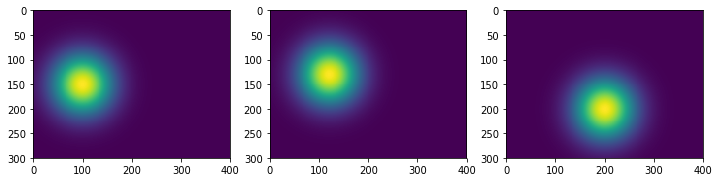

In [3]:
plt.figure(figsize=(12, 16))
p_hmap1 = 128.0 * makeGaussian(400, 300, (100, 150), 10)
plt.subplot(1, 3, 1)
plt.imshow(p_hmap1)

p_hmap2 = 140.0 * makeGaussian(400, 300, (120, 130), 10)
plt.subplot(1, 3, 2)
plt.imshow(p_hmap2)

p_hmap3 = 200.0 * makeGaussian(400, 300, (200, 200), 10)
plt.subplot(1, 3, 3)
plt.imshow(p_hmap3)

In [5]:
print X.shape, Y.shape, p_hmap1.shape

(300, 400) (300, 400) (300, 400)


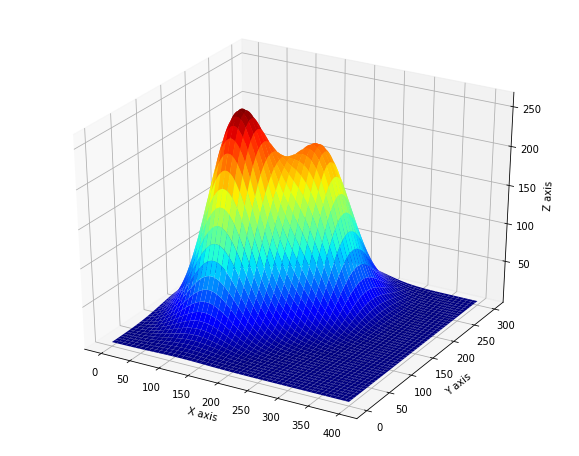

In [4]:
fig = plt.figure()
x = np.linspace(0, 400, 400)
y = np.linspace(0, 300, 300)
X, Y = np.meshgrid(x, y)

#Make a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, p_hmap1 + p_hmap2 + p_hmap3, cmap='jet',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [9]:
100 * makeGaussian(10, 10, (5, 5), 2)

array([[  70.71067812,   75.26233737,   79.00413119,   81.79020586,
          83.50879194,   84.08964153,   83.50879194,   81.79020586,
          79.00413119,   75.26233737],
       [  75.26233737,   80.10698776,   84.08964153,   87.05505633,
          88.88426812,   89.50250709,   88.88426812,   87.05505633,
          84.08964153,   80.10698776],
       [  79.00413119,   84.08964153,   88.27029963,   91.38314502,
          93.30329915,   93.95227492,   93.30329915,   91.38314502,
          88.27029963,   84.08964153],
       [  81.79020586,   87.05505633,   91.38314502,   94.60576467,
          96.59363289,   97.26549474,   96.59363289,   94.60576467,
          91.38314502,   87.05505633],
       [  83.50879194,   88.88426812,   93.30329915,   96.59363289,
          98.62327045,   99.30924954,   98.62327045,   96.59363289,
          93.30329915,   88.88426812],
       [  84.08964153,   89.50250709,   93.95227492,   97.26549474,
          99.30924954,  100.        ,   99.30924954,   97

In [10]:
100 * makeQuaratic(10, 10, (5, 5), 2)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


array([[   36.36363636,    37.59398496,    38.61003861,    39.37007874,
           39.84063745,    40.        ,    39.84063745,    39.37007874,
           38.61003861,    37.59398496],
       [   54.05405405,    56.81818182,    59.17159763,    60.97560976,
           62.11180124,    62.5       ,    62.11180124,    60.97560976,
           59.17159763,    56.81818182],
       [   86.95652174,    94.33962264,   101.01010101,   106.38297872,
          109.89010989,   111.11111111,   109.89010989,   106.38297872,
          101.01010101,    94.33962264],
       [  153.84615385,   178.57142857,   204.08163265,   227.27272727,
          243.90243902,   250.        ,   243.90243902,   227.27272727,
          204.08163265,   178.57142857],
       [  285.71428571,   384.61538462,   526.31578947,   714.28571429,
          909.09090909,  1000.        ,   909.09090909,   714.28571429,
          526.31578947,   384.61538462],
       [  400.        ,   625.        ,  1111.11111111,  2500.        ,
   

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


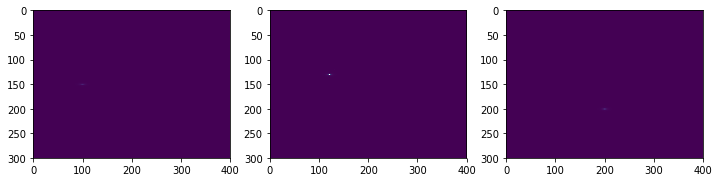

In [7]:
plt.figure(figsize=(12, 16))
p_hmap1 = 128.0 * makeQuaratic(400, 300, (100, 150), 10)
plt.subplot(1, 3, 1)
plt.imshow(p_hmap1)

p_hmap2 = 140.0 * makeQuaratic(400, 300, (120, 130), 10)
plt.subplot(1, 3, 2)
plt.imshow(p_hmap2)

p_hmap3 = 200.0 * makeQuaratic(400, 300, (200, 200), 10)
plt.subplot(1, 3, 3)
plt.imshow(p_hmap3)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


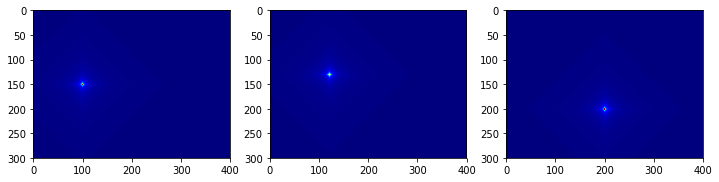

In [19]:
plt.figure(figsize=(12, 16))
p_hmap1 = 100.0 * makeLinear(400, 300, (100, 150), 10)
plt.subplot(1, 3, 1)
plt.imshow(p_hmap1, cmap='jet')

p_hmap2 = 100.0 * makeLinear(400, 300, (120, 130), 10)
plt.subplot(1, 3, 2)
plt.imshow(p_hmap2, cmap='jet')

p_hmap3 = 100.0 * makeLinear(400, 300, (200, 200), 10)
plt.subplot(1, 3, 3)
plt.imshow(p_hmap3, cmap='jet')

In [23]:
image = np.dstack((p_hmap3, p_hmap2 + p_hmap2 + p_hmap2 + p_hmap2, p_hmap1))
plt.imsave('booyah-3.png', image.astype(int))

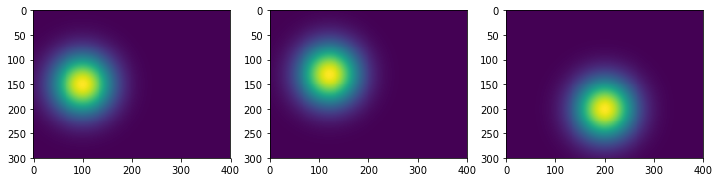

In [7]:
plt.figure(figsize=(12, 16))
o_hmap1 = 10.0 * makeGaussian(400, 300, (100, 150), 10)
plt.subplot(1, 3, 1)
plt.imshow(o_hmap1)

o_hmap2 = 5.0 * makeGaussian(400, 300, (120, 130), 10)
plt.subplot(1, 3, 2)
plt.imshow(o_hmap2)

o_hmap3 = 10.0 * makeGaussian(400, 300, (200, 200), 10)
plt.subplot(1, 3, 3)
plt.imshow(o_hmap3)

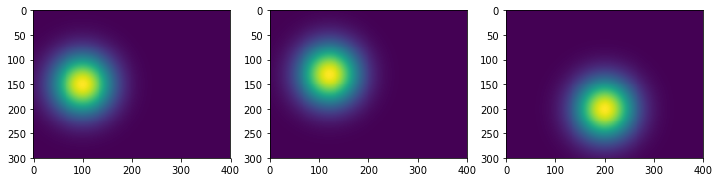

In [8]:
plt.figure(figsize=(12, 16))
n_hmap1 = 7.0 * makeGaussian(400, 300, (100, 150), 10)
plt.subplot(1, 3, 1)
plt.imshow(n_hmap1)

n_hmap2 = 2.0 * makeGaussian(400, 300, (120, 130), 10)
plt.subplot(1, 3, 2)
plt.imshow(n_hmap2)

n_hmap3 = 1.0 * makeGaussian(400, 300, (200, 200), 10)
plt.subplot(1, 3, 3)
plt.imshow(n_hmap3)

In [9]:
p_hmap = p_hmap1 + p_hmap2 + p_hmap3
n_hmap = n_hmap1 + n_hmap2 + n_hmap3
o_hmap = o_hmap1 + o_hmap2 + o_hmap3

In [14]:
img = np.dstack((n_hmap, o_hmap, p_hmap))
img.shape

(300, 400, 3)

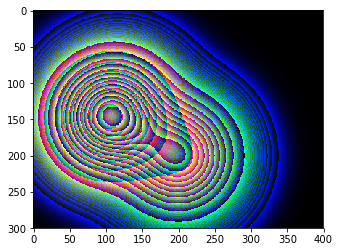

In [15]:
plt.imshow(img)

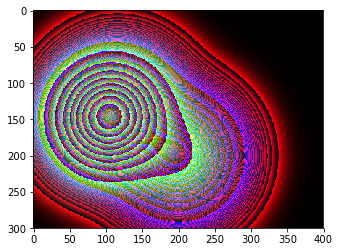

In [16]:
img_2 = np.dstack((p_hmap, n_hmap, o_hmap))
plt.imshow(img_2)

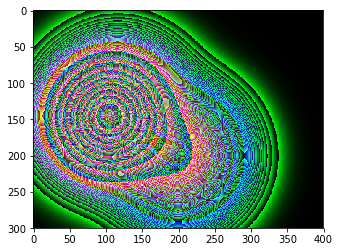

In [17]:
img_3 = np.dstack((n_hmap, p_hmap, o_hmap))
plt.imshow(img_3)

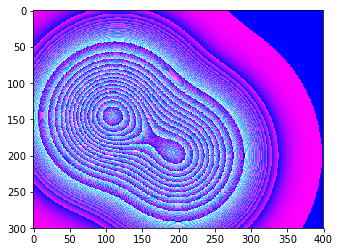

In [26]:
pn_hmap = n_hmap - p_hmap
dummy = np.ones((300, 400))
bw_img = np.dstack((pn_hmap, o_hmap, dummy))
plt.imshow(bw_img)

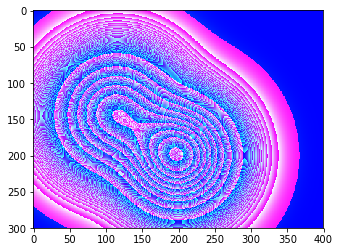

In [27]:
pn_hmap = n_hmap - o_hmap
dummy = np.ones((300, 400))
bw_img = np.dstack((pn_hmap, p_hmap, dummy))
plt.imshow(bw_img)

In [ ]:
plt.figure(figsize=(12, 16))
hmap1 = 128.0 * makeGaussian(400, 300, (100, 150), 10)
plt.subplot(1, 3, 1)
plt.imshow(hmap1)

hmap2 = 140.0 * makeGaussian(400, 300, (120, 130), 10)
plt.subplot(1, 3, 2)
plt.imshow(hmap2)

hmap3 = 200.0 * makeGaussian(400, 300, (200, 200), 10)
plt.subplot(1, 3, 3)
plt.imshow(hmap3)

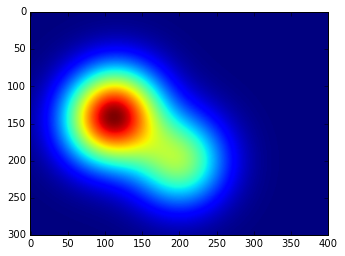

In [8]:
combined = hmap1 + hmap2 + hmap3
plt.imshow(combined)

In [6]:
combined.sum()

7940691.6501491452

In [9]:
combined.sum()

8603672.556010576

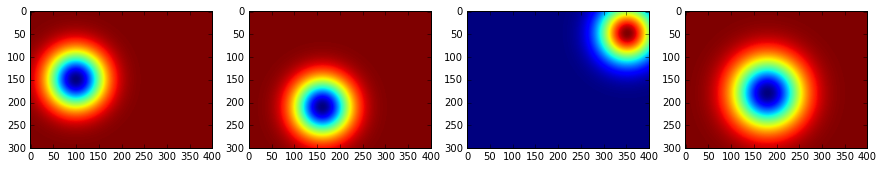

In [27]:
plt.figure(figsize=(15, 20))
hmap1 = -255.0 * makeGaussian(400, 300, (100, 150), 10)
plt.subplot(1, 4, 1)
plt.imshow(hmap1)

hmap2 = -255.0 * makeGaussian(400, 300, (160, 210), 10)
plt.subplot(1, 4, 2)
plt.imshow(hmap2)

hmap3 = 255.0 * makeGaussian(400, 300, (350, 50), 10)
plt.subplot(1, 4, 3)
plt.imshow(hmap3)

hmap4 = -255.0 * makeGaussian(400, 300, (180, 180), 12)
plt.subplot(1, 4, 4)
plt.imshow(hmap4)

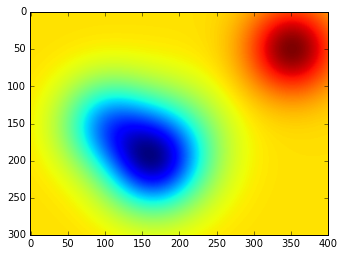

In [28]:
combined = hmap1 + hmap2 + hmap3 + hmap4
plt.imshow(combined)

### Experimenting with Large Matrices

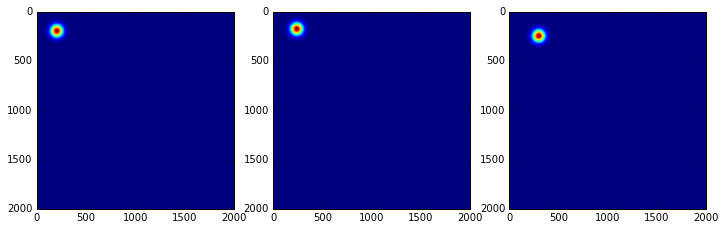

In [12]:
plt.figure(figsize=(12, 16))
hmap1 = 255.0 * makeGaussian(2000, 2000, (200, 200), 10)
plt.subplot(1, 3, 1)
plt.imshow(hmap1)

hmap2 = 255.0 * makeGaussian(2000, 2000, (240, 180), 10)
plt.subplot(1, 3, 2)
plt.imshow(hmap2)

hmap3 = 255.0 * makeGaussian(2000, 2000, (300, 250), 10)
plt.subplot(1, 3, 3)
plt.imshow(hmap3)

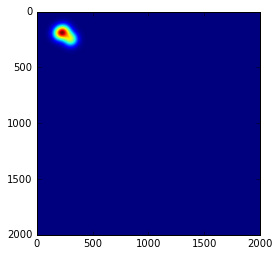

In [13]:
combined_close = hmap1 + hmap2 + hmap3
plt.imshow(combined_close)

In [14]:
combined_close.sum()

8668101.1732452549

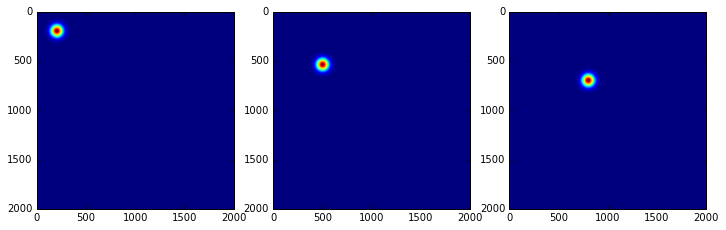

In [15]:
plt.figure(figsize=(12, 16))
hmap1 = 255.0 * makeGaussian(2000, 2000, (200, 200), 10)
plt.subplot(1, 3, 1)
plt.imshow(hmap1)

hmap2 = 255.0 * makeGaussian(2000, 2000, (500, 540), 10)
plt.subplot(1, 3, 2)
plt.imshow(hmap2)

hmap3 = 255.0 * makeGaussian(2000, 2000, (800, 700), 10)
plt.subplot(1, 3, 3)
plt.imshow(hmap3)

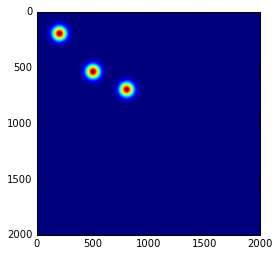

In [16]:
combined_far = hmap1 + hmap2 + hmap3
plt.imshow(combined_far)

In [17]:
combined_far.sum()

8668132.0076488536

In [ ]:
from PIL import Image
